# 임계값 영상

In [12]:
import cv2
import numpy as np

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

ret, dst = cv2.threshold(src,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print('ret:', ret)
cv2.imshow('dst', dst)

dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2', dst2)

dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3', dst3)
cv2.waitKey()
cv2.destroyAllWindows()

ret: 84.0


# 히스토그램 역투영

In [16]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

roi = cv2.selectROI(src)
print('roi=',roi)
roi_h = h[roi[1]:roi[1] + roi[3], roi[0]:roi[0] + roi[2]]
hist = cv2.calcHist([roi_h],[0],None,[64],[0,256])
backP = cv2.calcBackProject([h.astype(np.float32)], [0], hist, [0,256], scale = 1.0)

hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN+cv2.SORT_DESCENDING)
k = 1
T = hist[k][0] - 1
print('T=',T)
ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY)

cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

roi= (195, 188, 130, 81)
T= 1316.0


# 히스토그램 평활화

In [23]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png')

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

v2 = cv2.equalizeHist(v)
hsv2 = cv2.merge([h,s,v2])
dst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
cv2.imshow('dst', dst)

yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cv = cv2.split(yCrCv)

y2 = cv2.equalizeHist(y)
yCrCv2 = cv2.merge([y2, Cr, Cv])
dst2 = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

# 일반 히스토그램 평활화
dst = cv2.equalizeHist(src)
cv2.imshow('dst',dst)

# clahe 평탄화
clahe2 = cv2.createCLAHE(clipLimit=40, tileGridSize=(1,1))
dst2 = clahe2.apply(src)
cv2.imshow('dst2',dst2)

clahe2 = cv2.createCLAHE(clipLimit=10, tileGridSize=(8,8))
dst3 = clahe2.apply(src)
cv2.imshow('dst3',dst3)

cv2.waitKey()
cv2.destroyAllWindows()

# 블러 필터

In [40]:
import cv2
import numpy as np

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)
# 박스필터: 영상의 전체를 흐릿하게 만듬
dst1 = cv2.boxFilter(src, ddepth = -1, ksize = (11,11))
dst2 = cv2.boxFilter(src, ddepth = -1, ksize = (21,21))

# bilateralFilter: 가우시안 함수를 사용하여 에지를 덜 약화하면서 양방향 필터링을 함 
dst3 = cv2.bilateralFilter(src, d = 11, sigmaColor = 10, sigmaSpace = 10)
dst4 = cv2.bilateralFilter(src, d = -1, sigmaColor = 10, sigmaSpace = 10)

cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [44]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

# 미디안, 가우시안 필터링
dst1 = cv2.medianBlur(src, ksize = 7)
dst2 = cv2.blur(src, ksize = (7,7))
dst3 = cv2.GaussianBlur(src, ksize = (7,7), sigmaX = 0.0)
dst4 = cv2.GaussianBlur(src, ksize = (7,7), sigmaX = 10.0)

cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)

cv2.waitKey()
cv2.destroyAllWindows()

# 미분필터

In [46]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/rectangle.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3) # x축 편미분 적용
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3) # x축 편미분 적용

dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)

dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)

mag = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)

cv2.imshow('dstX',dstX)
cv2.imshow('dstY',dstY)
cv2.imshow('dstM',dstM)

cv2.waitKey()
cv2.destroyAllWindows()

mag: 0.0 1080.4674072265625 (0, 0) (100, 400)


In [54]:
# 그래디언트 방향 시각화

from matplotlib import pyplot as plt

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/rectangle.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3) # x축 편미분 적용
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3) # x축 편미분 적용

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees = True)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle)
print('angle:', minVal, maxVal, minLoc, maxLoc)

ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
cv2.imshow('edge', edge)

height, width = mag.shape[:2]
angleM = np.full((height, width, 3), (255, 255, 255), dtype = np.uint8)
for y in range(height):
    for x in range(width):
        if edge[x,y] != 0:
            if edge[y, x] == 0:
                angleM[y, x] = (0, 0, 255)  # red
            elif angle[y, x] == 90:
                angleM[y, x] = (0, 255, 0)  # green
            elif angle[y, x] == 180:
                angleM[y ,x] = (255, 0, 0)  # blue
            elif angle[y, x] == 270:
                angleM[y, x] = (0, 255, 255) # yellow
            else:
                angleM[y, x] = (128, 128, 128) # gray

cv2.imshow('angleM', angleM)
cv2.waitKey()
cv2.destroyAllWindows()

angle: 0.0 359.94378662109375 (0, 0) (400, 399)


In [55]:
# Laplacian filter

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize = (7, 7), sigmaX = 0.0)
cv2.imshow('src', src)
cv2.imshow('blur', blur)

lap = cv2.Laplacian(src, cv2.CV_32F)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('lap', lap)
cv2.imshow('dst', dst)

lap2 = cv2.Laplacian(blur, cv2.CV_32F)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('lap2', lap2)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

# 필터 연산

In [60]:
# filter2D 이용

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

kx, ky = cv2.getDerivKernels(1, 0, ksize = 3)
sobelX = ky.dot(kx.T)

print('kx=', kx)
print('ky=', ky)
print('sobleX=', sobelX)
gx = cv2.filter2D(src, cv2.CV_32F, sobelX)

kx, ky = cv2.getDerivKernels(0, 1, ksize = 3)
sobelY = ky.dot(kx.T)

print('kx=', kx)
print('ky=', ky)
print('sobleY', sobelY)
gy = cv2.filter2D(src, cv2.CV_32F, sobelY)

mag = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge', edge)

cv2.waitKey()
cv2.destroyAllWindows()

kx= [[-1.]
 [ 0.]
 [ 1.]]
ky= [[1.]
 [2.]
 [1.]]
sobleX= [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
kx= [[1.]
 [2.]
 [1.]]
ky= [[-1.]
 [ 0.]
 [ 1.]]
sobleY [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [68]:
# LOG(Laplacian of Gaussian)

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

def logFilter(ksize = 7):
    k2 = ksize // 2
    sigma = 0.3 * (k2-1) + 0.8
    print('sigma =', sigma)
    LoG = np.zeros((ksize, ksize), dtype = np.float32)
    for y in range(-k2, k2+1):
        for x in range(-k2, k2+1):
            g = -(x * x + y * y) / (2.0 * sigma ** 2)
            LoG[y+k2, x+k2] = -(1 + g) * np.exp(g) / (np.pi * sigma ** 4)
    print('k2 = ',k2)
    return LoG
    
kernel = logFilter(ksize = 15)
LoG = cv2.filter2D(src, cv2.CV_32F, kernel)
cv2.imshow('LoG', LoG)
kx, ky = cv2.getDerivKernels(1, 0, ksize = 3)
sobelX = ky.dot(kx.T)

def zeroCrossing2(lap, thresh = 1.0):
    h, w = lap.shape
    z = np.zeros(lap.shape, dtype = np.uint8)
    for y in range(1, h-1):
        for x in range(1, w-1):
            neighbors = [lap[y-1, x], lap[y+1, x],
                        lap[y, x-1], lap[y, x+1],
                        lap[y-1, x-1], lap[y-1, x+1],
                        lap[y+1, x-1], lap[y+1, x+1]]
            pos = 0
            neg = 0
            for value in neighbors:
                if value > thresh:
                    pos += 1
                if value < -thresh:
                    neg += 1
            if pos>0 and neg>0:
                z[y,x] = 255
    return z

edgeZ = zeroCrossing2(LoG)
cv2.imshow('zero crossing2', edgeZ)
cv2.waitKey()
cv2.destroyAllWindows()


sigma = 2.5999999999999996
k2 7


# 모폴로지 연산

In [69]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize = (3,3))
erode = cv2.erode(src, kernel, iterations = 5)
dilate = cv2.dilate(src, kernel, iterations = 5)
erode2 = cv2.erode(dilate, kernel, iterations = 7)

cv2.imshow('src', src)
cv2.imshow('erode', erode)
cv2.imshow('dilate', dilate)
cv2.imshow('erode2', erode2)
cv2.waitKey()
cv2.destroyAllWindows()

In [72]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize=(3,3))
closing = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel, iterations = 5)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations = 5)
gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernel, iterations = 5)
blackhat = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernel, iterations = 5)

cv2.imshow('opening', opening)
cv2.imshow('closing', closing)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat', tophat)
cv2.imshow('blackhat', blackhat)
cv2.waitKey()
cv2.destroyAllWindows()

# 탬플릿 매칭 - object detection 의 기본

In [75]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
tmp_A = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/A.bmp', cv2.IMREAD_GRAYSCALE)
tmp_S = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/S.bmp', cv2.IMREAD_GRAYSCALE)
tmp_b = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/b.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

# TM_SQDIFF_NORMED은 최솟값을 저장
R1 = cv2.matchTemplate(src, tmp_A, cv2.TM_SQDIFF_NORMED)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(R1)
print('minval, minloc for TM_SQDIFF_NORMED:', minVal, minLoc,
      '\n maxval, maxloc for TM_SQDIFF_NORMED:', maxVal, maxLoc,)
h, w = tmp_A.shape[:2]
cv2.rectangle(dst, minLoc, (minLoc[0] + w, minLoc[1] + h), (255, 0, 0), 2)

# TM_CCORR_NORMED은 최댓값을 저장
R2 = cv2.matchTemplate(src, tmp_S, cv2.TM_CCORR_NORMED)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(R2)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
h, w = tmp_S.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0] + w, maxLoc[1] + h), (0, 255, 0), 2)

# TM_CCOEFF_NORMED은 최댓값을 저장
R3 = cv2.matchTemplate(src, tmp_b, cv2.TM_CCOEFF_NORMED)
minVal, maxVal, minLoc, maxLoc= cv2.minMaxLoc(R3)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
h, w = tmp_S.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0] + w, maxLoc[1] + h), (0, 0, 255), 2)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

minval, minloc for TM_SQDIFF_NORMED: 3.170866023083363e-07 (40, 40) 
 maxval, maxloc for TM_SQDIFF_NORMED: 1.0 (0, 0)
TM_CCORR_NORMED: 1.0 (295, 200)
TM_CCORR_NORMED: 0.9566574096679688 (94, 360)


# canny 검출

In [76]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

edges1 = cv2.Canny(src, 50, 100)
edges2 = cv2.Canny(src, 50, 200)

cv2.imshow('edges1:', edges1)
cv2.imshow('edges2:', edges2)
cv2.waitKey()
cv2.destroyAllWindows()

# Hough 변환에 의한 직선 및 원 검출

In [79]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/rectangle.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)
lines = cv2.HoughLines(edges, rho = 1, theta = np.pi/180, threshold = 100)
print('lines.shape =', lines.shape)

for line in lines:
    rho, theta = line[0]
    c = np.cos(theta)
    s = np.sin(theta)
    x0 = c*rho
    y0 = s*rho
    x1 = int(x0 + 1000 * (-s))
    y1 = int(y0 + 1000 * (c))
    x2 = int(x0 - 1000 * (-s))
    y2 = int(y0 - 1000 * (c))    
    cv2.line(src, (x1,y1), (x2,y2), (0, 0, 255), 2)

cv2.imshow('edges', edges)
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()    

lines.shape = (4, 1, 2)


In [81]:
# HoughLinesP
lines = cv2.HoughLinesP(edges, rho = 1, theta = np.pi/180, threshold = 100)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(src, (x1, y1), (x2, y2), (0,0,255), 2)

cv2.imshow('edges', edges)
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows() 

In [96]:
# HoughCircles
src1 = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/circle2.jpg')
gray1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)
circles1 = cv2.HoughCircles(gray1, method = cv2.HOUGH_GRADIENT, dp = 1, minDist = 50, param2 = 15)
circles1 = np.int32(circles1)
print('circles1.shape=', circles1.shape)
for circle in circles1[0,:]:
    cx, cy, r = circle
    cv2.circle(src1, (cx, cy), r, (0,0,255), 2)

src2 = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/circle.jpg')
gray2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
circles2 = cv2.HoughCircles(gray2,method=cv2.HOUGH_GRADIENT,dp=1,minDist=50,param2=15, minRadius = 10, maxRadius = 100)
circles2 = np.int32(circles2)
print('circles2.shape= ',circles2.shape)
for circle in circles2[0,:]:
    cx,cy,r = circle
    cv2.circle(src2,(cx,cy),r,(0,0,255),2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)    
cv2.waitKey()
cv2.destroyAllWindows()

circles1.shape= (1, 3, 3)
circles2.shape=  (1, 6, 3)


# 컬러 범위에 의한 영상 분할

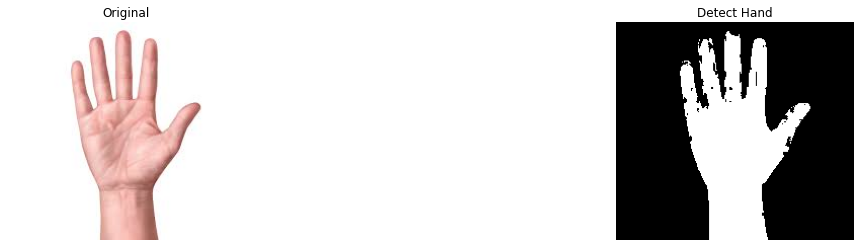

In [97]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/hand.jpg')
hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
lower = (0,30,0)
upper = (150,200,255)
dst = cv2.inRange(hsv,lower,upper)

src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,4))
image1=plt.subplot(1,2,1)
image1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('Detect Hand')
plt.axis('off')
plt.imshow(dst, cmap="gray")

plt.show()

# 윤곽선 검출 및 그리기

In [100]:
src = np.zeros(shape = (512, 512, 3), dtype = np.uint8)
src2 = src.copy()
gray = []
for n,i in enumerate([src, src2]):
    cv2.rectangle(i, (50,100), (450,400), (255,255,255), -1)
    cv2.rectangle(i, (100,150), (400,350), (0,0,0), -1)
    cv2.rectangle(i, (200,200), (300,300), (255,255,255), -1)
    gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

# mode는 RETR_EXTERNAL
mode1 = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(gray[0], mode, method)
cv2.drawContours(src, contours, -1, (255,0,0), 3)
for pt in contours[0][:]:
    cv2.circle(src, (pt[0][0], pt[0][1]), 5, (0, 0, 255), -1)

# mode는 RETR_LIST    
mode2 = cv2.RETR_LIST
method2 = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(gray[1], mode2, method2)
cv2.drawContours(src2, contours, -1, (255,0,0), 3)

for cnt in contours:
    cv2.drawContours(src2, [cnt], 0, (255,0,0), 3)
    
    for pt in cnt:
        cv2.circle(src2, (pt[0][0], pt[0][1]), 5, (0, 0, 255), -1)
    
cv2.imshow('src',src)
cv2.imshow('src2',src2)
cv2.waitKey()
cv2.destroyAllWindows()

# 영역 채우기, 거리계산, 워터 쉐드

#### 영역 채우기: 물체의 내부를 특정 값으로 채움
#### 거리계산: 영상 영역에서 내부의 0이 아닌 화소에서 가장 가까운 0인 화소까지의 거리를 계산
#### 워터 쉐드: 마커 기반으로 영상을 분리

In [101]:
src = np.zeros((512,512,3),dtype=np.uint8)

cv2.rectangle(src,(50,50),(200,200),(0,0,255),2)
cv2.circle(src,(300,300),100,(0,0,255),2)

dst = src.copy()
cv2.floodFill(dst,mask=None,seedPoint=(100,100),newVal=(255,0,0))

retval,dst2,mask,rect = cv2.floodFill(dst,mask=None,seedPoint=(300,300),newVal=(0,255,0))

print('rect=',rect)
x,y,width,height = rect
cv2.rectangle(dst2,(x,y),(x+width,y+height),(255,0,0),2)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

rect= (202, 202, 197, 197)


In [102]:
src = np.zeros((512,512),dtype=np.uint8)

cv2.rectangle(src,(50,200),(450,300),(255,255,255),-1)

dist = cv2.distanceTransform(src,distanceType=cv2.DIST_L1,maskSize=3)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(dist)
print('src:',minVal,maxVal,minLoc,maxLoc)

dst = cv2.normalize(dist,None,0,255,cv2.NORM_MINMAX,dtype=cv2.CV_8U)
ret,dst2 = cv2.threshold(dist,maxVal-1,255,cv2.THRESH_BINARY)

gx = cv2.Sobel(dist,cv2.CV_32F,1,0,ksize=3)
gy = cv2.Sobel(dist,cv2.CV_32F,0,1,ksize=3)
mag = cv2.magnitude(gx,gy)

minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(mag)
print('src:',minVal,maxVal,minLoc,maxLoc)
ret,dst3 = cv2.threshold(mag,maxVal-1,255,cv2.THRESH_BINARY_INV)

# dst: dist를 Normalization을 통해 선명하게 출력
# dst2: cv2.threshold()을 통하여 최대값만 출력
# dst3: dist의 edge출력 후 threshold를 통하여 최대값만 출력

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.waitKey()
cv2.destroyAllWindows()

src: 0.0 51.0 (0, 0) (100, 250)
src: 0.0 8.0 (0, 0) (52, 200)


In [110]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/hand.jpg')
mask = np.zeros(shape = src.shape[:2], dtype = np.uint8)
markers = np.zeros(shape = src.shape[:2], dtype = np.int32)
dst = src.copy()
cv2.imshow('dst',dst)

def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(param[0], (x,y), 10, (255,255,255), -1)
            cv2.circle(param[1], (x,y), 10, (255,255,255), -1)
    cv2.imshow('dst',param[1])

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_NONE
while True:
    cv2.setMouseCallback('dst', onMouse, [mask, dst])
    key = cv2.waitKey(30)
    
    if key == 0x1B:
        break
    elif key == ord('r'):
        mask[:,:] = 0
        dst = src.copy()
        cv2.imshow('dst',dst)
    elif key == ord(' '):
        contours, hierarchy = cv2.findContours(mask, mode, method)
        print('len(contours)=', len(contours))
        markers[:,:] = 0
        for i, cnt in enumerate(contours):
            cv2.drawContours(markers,[cnt],0,i+1,-1)
        cv2.watershed(src, markers)
        dst = src.copy()
        dst[markers == -1] = [0, 0, 255]
        for i in range(len(contours)):
            r = np.random.randint(256)
            g = np.random.randint(256)
            b = np.random.randint(256)
            dst[markers == -1] = [b,g,r]
           
        dst = cv2.addWeighted(src,0.4,dst,0.6,0)
        cv2.imshow('dst', dst)
        
cv2.destroyAllWindows()
    

len(contours)= 1
len(contours)= 1
len(contours)= 1
len(contours)= 1
len(contours)= 1
len(contours)= 1


# 피라미드 기반 분할
#### 영상처리에 있어서 여러 스케일에 걸쳐 피라미드를 생성하여 처리를 하게 되면 물체를 비교하거나 매칭에 용이하게 쓸 수 있다. 예를들어 Object Detection에서 다른 스케일에서 동일한 객체인지 판단할 경우에 사용된다. 이러한 Image Pyramid는 (1)Gaussian Pyramids 와 (2) Laplacian Pyramids로 구분된다.

In [111]:
def floodFillPostProcess(src,diff=(2,2,2)):
    img = src.copy()
    rows,cols = img.shape[:2]
    mask = np.zeros(shape=(rows+2,cols+2),dtype=np.uint8)
    for y in range(rows):
        for x in range(cols):
            if mask[y+1,x+1] == 0:
                r = np.random.randint(256)
                g = np.random.randint(256)
                b = np.random.randint(256)
                cv2.floodFill(img,mask,(x,y),(b,g,r),diff,diff)
    return img

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/flower.jpg')
hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
dst = floodFillPostProcess(src)
dst2 = floodFillPostProcess(hsv)
cv2.imshow('src', src)
cv2.imshow('hsv',hsv)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2)

res = cv2.pyrMeanShiftFiltering(src, sp = 5, sr = 20, maxLevel = 4)
dst3 = floodFillPostProcess(res)

term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 2)
res2 = cv2.pyrMeanShiftFiltering(hsv, sp = 5, sr = 20, maxLevel = 4, termcrit = term_crit)
dst4 = floodFillPostProcess(res2)

cv2.imshow('res', res)
cv2.imshow('res2',res2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)
cv2.waitKey()
cv2.destroyAllWindows()

# K 평균 클러스터링

In [124]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/hand.jpg')
src2 = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/flower.jpg')

hsv1 = cv2.cvtColor(src1,cv2.COLOR_BGR2HSV)
hsv2 = cv2.cvtColor(src2,cv2.COLOR_BGR2HSV)

data1 = src1.reshape((-1,3)).astype(np.float32)
data2 = src2.reshape((-1,3)).astype(np.float32)

data3 = hsv1.reshape((-1,3)).astype(np.float32)
data4 = hsv2.reshape((-1,3)).astype(np.float32)

K = 3
term_crit = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

ret1,labels1,centers1 = cv2.kmeans(data1,K,None,term_crit,5,cv2.KMEANS_RANDOM_CENTERS)
ret2,labels2,centers2 = cv2.kmeans(data2,K,None,term_crit,5,cv2.KMEANS_RANDOM_CENTERS)
ret3,labels3,centers3 = cv2.kmeans(data3,K,None,term_crit,5,cv2.KMEANS_RANDOM_CENTERS)
ret4,labels4,centers4 = cv2.kmeans(data4,K,None,term_crit,5,cv2.KMEANS_RANDOM_CENTERS)

centers1 = np.uint8(centers1)
res1 = centers1[labels1.flatten()]
bgr1 = res1.reshape(src1.shape)

centers2 = np.uint8(centers2)
res2 = centers2[labels2.flatten()]
bgr2 = res2.reshape(src2.shape)

centers3 = np.uint8(centers3)
res3 = centers3[labels3.flatten()]
bgr3 = res3.reshape(hsv1.shape)

centers4 = np.uint8(centers4)
res4 = centers4[labels4.flatten()]
bgr4 = res4.reshape(hsv2.shape)

cv2.imshow('bgr',bgr1)
cv2.imshow('bgr2',bgr2)
cv2.imshow('bgr3',bgr3)
cv2.imshow('bgr4',bgr4)
cv2.waitKey()
cv2.destroyAllWindows()

# 연결 요소 검출

In [121]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/circle2.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret,res = cv2.threshold(gray,128,255,cv2.THRESH_BINARY_INV)

ret,labels = cv2.connectedComponents(res)
print('ret=',ret)
print('labels.shape=', labels.shape)

dst = np.zeros(src.shape,dtype=src.dtype)

for i in range(1,ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b,g,r]

cv2.imshow('res',res)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()    

ret= 4
labels.shape= (512, 512)


In [123]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/data/circle2.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret,res = cv2.threshold(gray,128,255,cv2.THRESH_BINARY_INV)

ret,labels,stats,centroids = cv2.connectedComponentsWithStats(res)

print('ret=',ret)
print('stats=',stats)
print('centroids',centroids)

dst = np.zeros(src.shape,dtype=src.dtype)

for i in range(1,int(ret)):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b,g,r]

for i in range(1,int(ret)):
    x,y,width,height,area = stats[i]
    cv2.rectangle(dst,(x,y),(x+width,y+height),(0,0,255),2)
    cx,cy = centroids[i]
    cv2.circle(dst,(int(cx),int(cy)),5,(255,0,0),-1)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()     

ret= 4
stats= [[     0      0    512    512 245213]
 [    70    170     61     61   2821]
 [   120    220     61     61   2821]
 [    20    340    121    121  11289]]
centroids [[266.58220404 249.54933874]
 [100.         200.        ]
 [150.         250.        ]
 [ 80.         400.        ]]
